# Linking discretized RgL plane with conformations of IDPs

When bound to its partner, the protein PUMA behaves as a structured protein, presenting an alpha-helical structure. However, in isolatation, PUMA does not seem to have a well defined structure, i.e., it behaves as an intrinsically disordered protein (IDP). The isolated PUMA protein (residues 128-161 from Uniprot Q99ML1) is then used to investigate how the hubs in the discretized RgL plane relate (or not) to the possible IDP conformations. We want to investigate the energy characteristics of the most occupied hubs and typical conformations of different energy ranges.

## Building network diagram

First, we build the RgL network parameters of PUMA and list of energies of the four most occupied bins:

In [1]:
from RgL2 import RgL

path='/home/belisa/Documents/PUMA_ext/3.2-wocmap/'
fin=path+'outtime_0.35_en.txt'
sysRgL=RgL(fin, lim=1000001, idx=3, dt=20, nhubs=4, energy=True, contacts=True, 
           compute_energy=True, compute_contacts=True)

Calculating binning parameters.
xmin =7, xmax=30, len_xbin=1.0361831039142766
ymin =4, ymax=96, len_ybin=9.392794930265122
Setting selHubIDs = np.arange(0,nhubs).
Hubs: [(3, 2), (4, 2), (4, 3), (3, 3)]


Then we save the network parameters in output files and generate the network graph:

Generating output files:
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_occupancy_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_bins_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_transitions_dt20_tp0.35.txt
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.eps
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.png


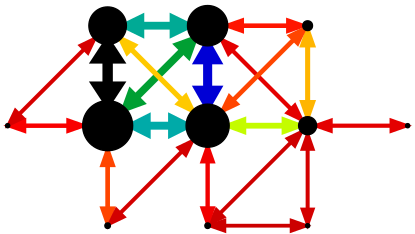

In [2]:
import ManageFile as mf
import GraphNetwork as gn
from IPython.display import Image

propname = ['occupancy', 'bins', 'transitions']
outname = [mf.set_output_name('PUMA', p, dt=20, tp=0.35, path=path, nhubs=4) for p in propname]
sysRgL.prop_to_file(propname, outname)
[occ_file, bins_file, trans_file] = outname
nwRgL = gn.graph(occ_file, trans_file, shift_color=0.8,
                 splines=True, ffac=0.05, facbothdir=0.8)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='eps', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='png', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname, fmt='png')
Image(graphname)

The network has four hubs (most occupied bins). Now we put axes and identify the hubs from 1 to 4, where 1 is the most occupied hub:

![](PUMA_network.png)

 ## Energy distribution of the hubs in the network
 
 The hubs have the corresponding energy distributions (median energies indicated by dotted lines):

Median energy value for hub 1:-61.4025
Median energy value for hub 2:-58.095
Median energy value for hub 3:-58.506
Median energy value for hub 4:-61.3185


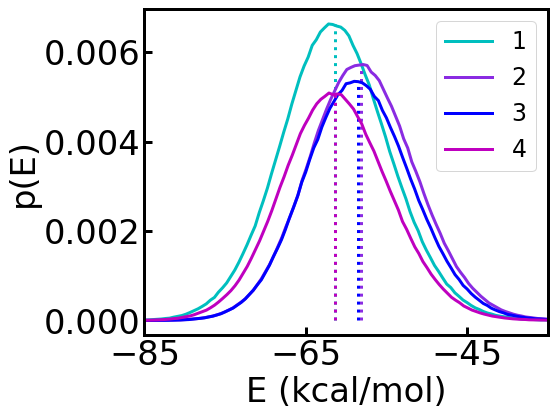

In [3]:
import numpy as np
import set_figure3 as setfig

def distribution(x, weights, bsize):
    xlen = max(x)-min(x)
    nbins = int(xlen/bsize)
    edges = np.linspace(min(x),max(x),nbins)
    H, edges = np.histogram(x, bins=edges, weights=weights)
    
    centers = np.array(edges) + bsize*0.5
    centers = centers[0:-1]
    listH = list(H.T)
    medx = np.median(x)
    
    return centers, listH, medx

colors = ['c', 'blueviolet', 'b', 'm', 'r']
medE = []
Emax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]               
    
    E = [1.5*c for (a,b,c) in sysRgL.Elist[i]] #1.5 factor for units in kcal/mol
    weights = np.ones_like(E)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, medE = distribution(E, weights, bsize=0.5)
    
    maxH = max(listH)
    vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
    xline = [medE]*len(vline)    
    sbpl.plot(centers, listH, linewidth=3, label=str(i+1), color=color)
    sbpl.plot(xline, vline, ':', linewidth=3, color=color)
    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=-85, xmax=-35, xstep_tick=20,
                          xlabel=r'E (kcal/mol)', ylabel=r'p(E)',
                         )
    print('Median energy value for hub '+str(i+1)+':'+str(medE))

figname=path+'Energy_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')

## Hub conformations and different regions in the energy spectrum

In order to investigate the link between the hubs and possible conformations, typical conformations corresponding to the low energy region (LER) and median energy region (MER) were analysed. The LER (MER) region was defined as a region where $E < 0.75E_\mathrm{min}$ ($1.05E_\mathrm{med} < E < 0.95E_\mathrm{med}$), where $E_\mathrm{min}$ ($E_\mathrm{med}$) is the minimum (median) value of energy in a hub. As the energy distribution of the hubs have overlapping regions, similar conformations are found for different hubs, as shown below for the LER region:

![](PUMA_energy_confs.png)

The conformations are labeled according to the corresponding hub label. In the table below, the corresponding energies and RMSD of the LER conformations above are shown, where the lowest energy conformation among the three was considered as the reference conformation for RMSD calculation. As a matter of reference, a Trp-Cage (1L2Y) trajectory that lasted 1 000 000 $\tau$ yielded an average RMSD of 3.79$\overset{\circ}{A}$ (3.21$\overset{\circ}{A}$ with chiral potential, 0.87$\overset{\circ}{A}$ when only comparing structures provided in 1L2Y.pdb).

| Conf. | Energy (Kcal/mol) | RMSD ($\overset{\circ}{A}$) | 
| --- | --- | --- |
| 1 | -75.7 | 3.03 |
| 2 | -78.6 | 0.00 |
| 3 | -73.0 | 4.72 |

As for comparing LER and MER conformations, two movies are shown below for conformations of hub 1, where formed contacts are highlighted. The criteria to build the contact map during the simulations was i,i+3. However, in the movies, only contacts that obbey the criteria i,i+5 are shown.

LER             |  MER
:-------------------------:|:-------------------------:
![alt text](hub1_e-75p7_traj34_ts298.gif)  |  ![alt text](hub1_e-56p329_traj17_ts72.gif)

When compared to the LER conformation, the MER conformation has a RMSD of 4.99$\overset{\circ}{A}$. The number of contacts for each case and criteria are below.

| - | i,i+3 | i,i+5 | 
| --- | --- | --- |
| LER | 72 | 50 |
| MER | 62 | 35 |

The number of MER contacts is smaller than the number of LER contacts. However, this is only an example and only for the most occupied hub. In order to have a better understanding of the contact formation, the distributions of the number of contacts of the hubs are computed below:

Median number of contacts for hub 1: 66.0
Median number of contacts for hub 2: 63.0
Median number of contacts for hub 3: 63.0
Median number of contacts for hub 4: 66.0


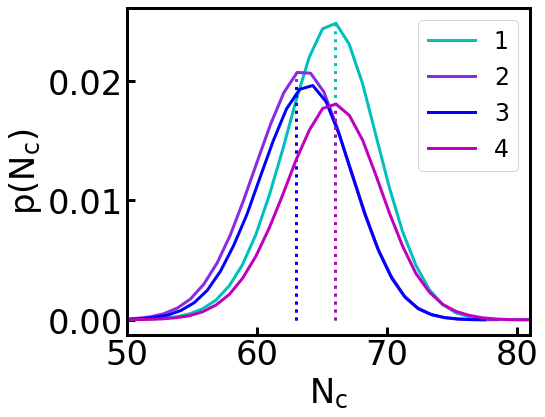

In [4]:
mednc = []
ncmax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]               
    
    nc = [c for (a,b,c) in sysRgL.nclist[i]]
    weights = np.ones_like(nc)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc, weights, bsize=1)
    
    maxH = max(listH)
    vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
    xline = [mednc]*len(vline) 
    sbpl.plot(centers, listH, linewidth=3, label=str(i+1), color=color)
    sbpl.plot(xline, vline, ':', linewidth=3, color=color)
    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=50, xmax=81, xstep_tick=10,
                          xlabel=r'N$_\mathrm{c}$', ylabel=r'p(N$_\mathrm{c}$)')
    print('Median number of contacts for hub '+str(i+1)+': '+str(mednc))

figname=path+'nc_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')

And the distributions of the number of contacts for the LER (dashed curve) and MER (solid curve) regions are computed below for each hub:

In [14]:
fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]     
    
    E = [1.5*c for (a,b,c) in sysRgL.Elist[i]]
    medE = np.median(E)
    minE = min(E)
    
    nc_ler = []
    nc_mer = []
    for k,x in enumerate(E):
        if x < 0.75*minE: #LER
            nc_ler.append(sysRgL.nclist[i][k][2])
        elif (x > 1.05*medE and x < 0.95*medE): #MER
            nc_mer.append(sysRgL.nclist[i][k][2])
    
    weights = np.ones_like(nc_ler)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc_ler, weights, bsize=1)
    print('Median number of LER contacts in hub '+str(i)+': '+str(mednc)) 

    sbpl.plot(centers, listH, '--', linewidth=3, color=color)

    weights = np.ones_like(nc_mer)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc_mer, weights, bsize=1)
    print('Median number of MER contacts in hub '+str(i)': '+str(mednc))

    sbpl.plot(centers, listH, '-', linewidth=3, label=str(i+1), color=color)

    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          #xmin=50, xmax=81, xstep_tick=10,
                          xlabel=r'N$_\mathrm{c}$', ylabel=r'p(N$_\mathrm{c}$)')
    

figname=path+'nc_er.eps'
fig.savefig(figname, dpi=600, fmt='eps')

SyntaxError: invalid syntax (<ipython-input-14-78eb9dddbd6b>, line 26)

In [9]:
sysRgL.nclist[0][0][2]

57.0

In [ ]:
    nc = [c for (a,b,c) in sysRgL.nclist[i]]
    
    
    
    nc = [c for (a,b,c) in sysRgL.nclist[i]]
    E = [1.5*c for (a,b,c) in sysRgL.Elist[i]] #1.5 factor for units in kcal/mol
    medE = np.median(E)

    nc_ler = []
    nc_mer = []
    for k,x in enumerate(E):
        if x < 0.75*min(E): #LER
            nc_ler.append(nc[k])
        elif x > 1.05*medE and x < 0.95*medE: #MER
            nc_mer.append(nc[k])

    weights = np.ones_like(nc_ler)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc_ler, weights, bsize=1)
    print('Median number of LER contacts: '+str(mednc)) 

    sbpl.plot(centers, listH, '--', linewidth=3, label=str(i+1), color=color)

    weights = np.ones_like(nc_mer)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, mednc = distribution(nc_mer, weights, bsize=1)
    print('Median number of MER contacts: '+str(mednc))

    sbpl.plot(centers, listH, '-', linewidth=3, color=color)

    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          #xmin=50, xmax=81, xstep_tick=10,
                          xlabel=r'N$_\mathrm{c}$', ylabel=r'p(N$_\mathrm{c}$)')
    

figname=path+'nc_er.eps'
fig.savefig(figname, dpi=600, fmt='eps')

### Searching for apha-helices

When bound to its partner, PUMA presents an alpha-helical structure. The figure below show a conformation for PUMA (130-156 residues of 2ROC.pdb), in red, when bound to its partner MCL-1, in transparent gray, which is kept fixed during the simulation. The observed turns are similar to the alpha-helical pattern, where ~3.6 residues complete a turn.

![](2ROC_traj1_ts1000.png)

For the case of isolated PUMA, however, the alpha-helical structure is unstable. The movies below show LER and MER conformations of hub 2, with contacts obbeying the criteria i,i+5 shown. The turns shown in the conformations occur nearly at the same region of the chain, i.e., between residues 19-25 (19-24)  &ndash; indicated in the movie &ndash; for the LER (MER) conformation. This means that the turns have ~5 residues, larger than 3.6 residues expected for an alpha-helix.

LER             |  MER
:-------------------------:|:-------------------------:
![alt text](hub4_e-75p4_traj77_ts967_2.gif)  |  ![alt text](hub4_e-56p248_traj46_ts578_2.gif)

When compared to the LER conformation, the MER conformation has a RMSD of 6.12$\overset{\circ}{A}$. The number of contacts for each case and criteria are below.

| - | i,i+3 | i,i+5 | 
| --- | --- | --- |
| LER | 68 | 40 |
| MER | 63 | 35 |